# Assignment 5
### Do all four questions.

Maggie Crowner

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [132]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [133]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [134]:
A @ e_1

array([1, 4, 7])

In [135]:
A @ e_2

array([2, 5, 8])

In [136]:
A @ e_3

array([3, 6, 9])

e_1 multiplies the first column of A by 1, the second by 0, and the third by 0, and adds each row's results together. This results in just the first column of A, since multiplying by 0 yields 0. Similarly, multiplying A by e_2 results in just the second column of A, and multiplying A by e_3 results in just the third column of A.

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [137]:
u = np.ones(3)

In [138]:
A @ u

array([ 6., 15., 24.])

Since u multiplies all columns of A by 1 and adds each row's results together, the final result is just the sum of each row in A, which is 6, 15, and 24.

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [139]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])

In [140]:
A @ x

array([-2,  4, 11])

Multiplying a 1xm vector by an identity matrix just yields itself as a nx1 vector, since it takes the first value only for the first row, second value for the second row, and third value for the third row.

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [141]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])

In [142]:
A @ x

array([11, -2,  4])

If the 1's are not on the diagonal, it will take the values of the 1xm vector in a different order. In this case, it takes the third value for the first row, the first value for the second row, and the second value for the third row.

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [143]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [144]:
A @ e_1

array([0.50052958, 0.02574731, 0.47372311])

In [145]:
A @ e_2

array([0.24049286, 0.39251588, 0.36699127])

In [146]:
A @ e_3

array([0.18358131, 0.37907577, 0.43734292])

Each of these results comprises of one of the columns from A. In this case, since columns are normalized to sum to 1, each of the resulting vectors is a column that sums to 1. For the first column of A, that describes the proportions of observations that moved from state 1 to state i, and similarly for the second and third columns. They add to 1 since it is a proportion of the original observations in state j.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [147]:
B = A @ e_1
for i in range(5):
    print(B)
    B = A @ B

[0.50052958 0.02574731 0.47372311]
[0.34368862 0.20257047 0.45374091]
[0.30404142 0.26036337 0.43559521]
[0.29476439 0.27514859 0.43008701]
[0.29266551 0.27862515 0.42870935]


In [148]:
B = A @ e_2
for i in range(5):
    print(B)
    B = A @ B

[0.24049286 0.39251588 0.36699127]
[0.28214379 0.29937825 0.41847795]
[0.29004438 0.28341002 0.42654561]
[0.29163968 0.2804039  0.42795643]
[0.29197422 0.27979983 0.42822595]


In [149]:
B = A @ e_3
for i in range(5):
    print(B)
    B = A @ B

[0.18358131 0.37907577 0.43734292]
[0.26334088 0.31930609 0.41735304]
[0.28521895 0.29032145 0.4244596 ]
[0.29050361 0.28220175 0.42729464]
[0.29171646 0.2802254  0.42805814]


When multiplying each of e1, e2, and e3 by A 5 times, we see all of the results converge towards the same vector of around (0.29, 0.28, 0.43).

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [150]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [151]:
state1 = np.array([1,0])
T @ state1

array([0.25, 0.75])

This represents the first column of T, which is the proportions of observations that transition from state 1 to state i.

In [152]:
T @ (T @ state1)

array([0.4375, 0.5625])

This represents a forecast of observations that transition from state 1 to state i, and then transition again back to state 1.

In [153]:
n = 100
p = np.array([1,0])
for t in range(n):
    print(p)
    p = T @ p

[1 0]
[0.25 0.75]
[0.4375 0.5625]
[0.390625 0.609375]
[0.40234375 0.59765625]
[0.39941406 0.60058594]
[0.40014648 0.59985352]
[0.39996338 0.60003662]
[0.40000916 0.59999084]
[0.39999771 0.60000229]
[0.40000057 0.59999943]
[0.39999986 0.60000014]
[0.40000004 0.59999996]
[0.39999999 0.60000001]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0

It starts to settle around (0.4, 0.6).

In [154]:
n = 100
p = np.array([0,1])
for t in range(n):
    print(p)
    p = T @ p

[0 1]
[0.5 0.5]
[0.375 0.625]
[0.40625 0.59375]
[0.3984375 0.6015625]
[0.40039062 0.59960938]
[0.39990234 0.60009766]
[0.40002441 0.59997559]
[0.3999939 0.6000061]
[0.40000153 0.59999847]
[0.39999962 0.60000038]
[0.4000001 0.5999999]
[0.39999998 0.60000002]
[0.40000001 0.59999999]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6

I get the same result of (0.4, 0.6) when starting in state 2 for the initial condition.

In [155]:
n = 100
state = 0
sim = []
for t in range(n):
    sim.append(state)
    prob = T[:, state]
    state = np.random.choice(p=prob, a=[0,1])

In [156]:
sim

[0,
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 n

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [157]:
import pandas as pd
weather = pd.read_csv('data/cville_weather.csv')
weather.head(3)

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN


Yes, there are many missing values in this data set. DAPR, DAPR_ATTRIBUTES, MDPR, MDPR_ATTRIBUTES, SNWD, and SNWD_ATTRIBUTES have very few data points at all, which could cause huge issues for any sort of analysis.

In [158]:
import re
import numpy as np

weather['rain'] = (weather['PRCP'] > 0).astype(int)

with open('data/cville_weather.csv', 'r') as f:
    seq = []
    for i, line in enumerate(f):
        line = line.strip().lower()
        line = re.sub(r'[^01]', '', line) 
        seq.extend(list(line)) 
seq = np.array(seq, dtype=int)

T = len(seq)
states = np.unique(seq) 
n_states = len(states)
tr_counts = np.zeros((n_states, n_states), dtype=int)

for t in range(1, T):
    x_tm1 = seq[t-1]
    x_t = seq[t]
    index_from = np.where(states == x_tm1)[0][0]
    index_to = np.where(states == x_t)[0][0]
    tr_counts[index_from, index_to] += 1

print(f'\nTransition Counts:\n {tr_counts}')

sums = tr_counts.sum(axis=1)
print('State proportions: \n')

tr_df = pd.DataFrame(sums/np.sum(sums,axis=0), index=states)
print(tr_df)

tr_pr = np.divide(tr_counts, sums[:, None], 
                  out=np.zeros_like(tr_counts, dtype=float), 
                  where=sums[:, None] != 0)

print('\nTransition Probabilities:')
tr_df = pd.DataFrame(np.round(tr_pr, 3), index=states, columns=states)
tr_df.index.name = "From"
tr_df.columns.name = "To"
print(tr_df)


Transition Counts:
 [[2095  768]
 [ 769  117]]
State proportions: 

         0
0  0.76367
1  0.23633

Transition Probabilities:
To        0      1
From              
0     0.732  0.268
1     0.868  0.132


The likelihood that it will rain if it rained yesterday is 0.132, and the likelihood that it will rain if it was clear yesterday is 0.268.

In [159]:
initial_state = 0
state_index = np.where(states == 0)

density = np.zeros(len(states))
density[state_index] = 1

print(f'Transition matrix:\n {tr_pr} \n')
print(f'Initial Density:\n {density.reshape(-1,1)} \n')

for k in range(10):
    density = density @ tr_pr
    print(density)

Transition matrix:
 [[0.73174991 0.26825009]
 [0.86794582 0.13205418]] 

Initial Density:
 [[1.]
 [0.]] 

[0.73174991 0.26825009]
[0.76828448 0.23171552]
[0.76330862 0.23669138]
[0.76398631 0.23601369]
[0.76389401 0.23610599]
[0.76390658 0.23609342]
[0.76390487 0.23609513]
[0.7639051 0.2360949]
[0.76390507 0.23609493]
[0.76390508 0.23609492]


In [160]:
initial_state = 1
state_index = np.where(states == 1)

density = np.zeros(len(states))
density[state_index] = 1

print(f'Transition matrix:\n {tr_pr} \n')
print(f'Initial Density:\n {density.reshape(-1,1)} \n')

for k in range(10):
    density = density @ tr_pr
    print(density)

Transition matrix:
 [[0.73174991 0.26825009]
 [0.86794582 0.13205418]] 

Initial Density:
 [[0.]
 [1.]] 

[0.86794582 0.13205418]
[0.74973515 0.25026485]
[0.76583496 0.23416504]
[0.76364223 0.23635777]
[0.76394087 0.23605913]
[0.7639002 0.2360998]
[0.76390574 0.23609426]
[0.76390499 0.23609501]
[0.76390509 0.23609491]
[0.76390507 0.23609493]


From either initial state, it converges to a stable value after around 3 or 4 iterations.

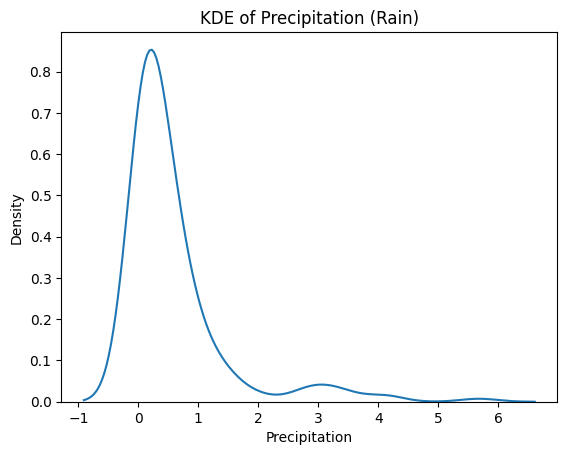

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

rain = weather[weather['rain'] == 1]

sns.kdeplot(rain['PRCP'])
plt.title("KDE of Precipitation (Rain)")
plt.xlabel("Precipitation")
plt.ylabel("Density")
plt.show()

A few ways to make this model more useful for prediction would be to add more states other than just clear or rainy or to add additional predictors/blocks such as season. Adding more states (storm, heavy rain, light rain, showers, clear) would provide more specifics and likely eliminate some false predictions due to low precipitation values. Blocking for season would be useful since it may be more likely to rain at certain times of year than other times.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [162]:
import pickle

with open('data/taxicab.pkl', 'rb') as f:
    data = pickle.load(f)

In [163]:
states = set(data[0])
for i in range(1, len(data)):
    new_trip = data[i]
    new_states = set(new_trip)
    states = states.union(new_states)
states = list(states)

In [164]:
n_states = len(states)
tr_counts = np.zeros((n_states, n_states))
for trip in data:
    seq = np.array(trip)
    for t in range(1, len(seq)):
        x_tm1 = seq[t-1]
        x_t = seq[t]
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        tr_counts[index_from, index_to] += 1

In [165]:
tr_counts

array([[6.257200e+04, 1.859200e+04, 4.980000e+02, ..., 1.862000e+03,
        4.180000e+02, 6.067900e+04],
       [1.954600e+04, 1.283151e+06, 1.260500e+04, ..., 9.231900e+04,
        7.540000e+02, 7.201700e+04],
       [4.590000e+02, 1.314900e+04, 3.239700e+04, ..., 3.974000e+03,
        3.800000e+01, 4.258000e+03],
       ...,
       [2.445000e+03, 7.265000e+04, 3.372000e+03, ..., 5.226800e+04,
        1.290000e+02, 1.170500e+04],
       [3.760000e+02, 1.065000e+03, 5.200000e+01, ..., 1.230000e+02,
        3.918000e+03, 2.351000e+03],
       [5.908000e+04, 7.819100e+04, 4.204000e+03, ..., 1.095800e+04,
        2.023000e+03, 6.623970e+05]], shape=(38, 38))

In [166]:
sums = tr_counts.sum(axis=0)
print('State proportions: \n')

tr_df = pd.DataFrame(sums/np.sum(sums,axis=0), index=states)
print(tr_df)

State proportions: 

                                0
Flatiron District    1.721397e-02
Upper East Side      1.218389e-01
Morningside Heights  7.085715e-03
SoHo                 2.397820e-02
Kips Bay             2.211337e-02
Upper West Side      7.854106e-02
Liberty Island       4.354946e-08
Murray Hill          2.849864e-02
Hell's Kitchen       5.331870e-02
Lower East Side      1.613795e-02
Two Bridges          4.523918e-04
Inwood               6.232799e-04
Tribeca              1.779605e-02
Roosevelt Island     3.488312e-04
Stuyvesant Town      4.846445e-03
Gramercy             2.185064e-02
Governors Island     5.225935e-07
Ellis Island         1.306484e-07
Randall's Island     1.569087e-04
East Village         3.869997e-02
Chinatown            4.610712e-03
Financial District   1.923122e-02
Outside Manhattan    1.029492e-01
Marble Hill          2.146988e-05
Battery Park City    9.982974e-03
West Village         3.655376e-02
Greenwich Village    2.222164e-02
Theater District     3.8064

In [167]:
tr_pr = np.divide(tr_counts, sums[:, None], 
                  out=np.zeros_like(tr_counts, dtype=float), 
                  where=sums[:, None] != 0)

print('\nTransition Probabilities:')
tr_df = pd.DataFrame(np.round(tr_pr, 3), index=states, columns=states)
tr_df.index.name = "From"
tr_df.columns.name = "To"
print(tr_df)


Transition Probabilities:
To                   Flatiron District  Upper East Side  Morningside Heights  \
From                                                                           
Flatiron District                0.158            0.047                0.001   
Upper East Side                  0.007            0.459                0.005   
Morningside Heights              0.003            0.081                0.199   
SoHo                             0.016            0.028                0.001   
Kips Bay                         0.030            0.069                0.001   
Upper West Side                  0.005            0.107                0.023   
Liberty Island                   0.000            0.000                0.000   
Murray Hill                      0.024            0.089                0.001   
Hell's Kitchen                   0.010            0.045                0.004   
Lower East Side                  0.010            0.036                0.001   
Two Bridges  

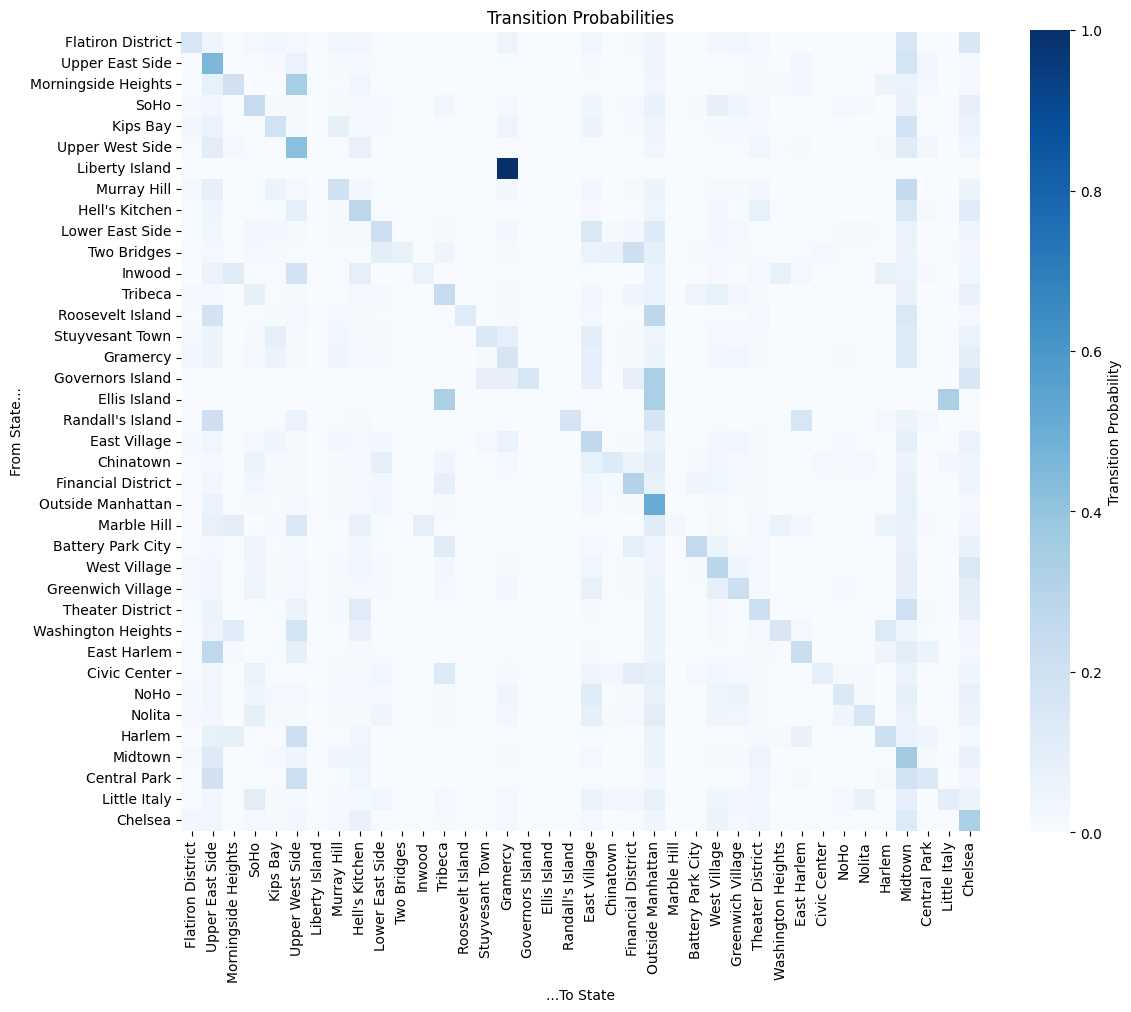

In [168]:
plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',   
            square=True,    
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The most common route is from Liberty Island to Gramercy. Upper East Side to Upper West Side, Upper West Side to Upper East Side, and Outside Manhattan to Outside Manhattan are also common. Taxicabs are most likely order 1, and not order 2, because their trips don't depend on previous trips as they are completely determined by request of the riders.

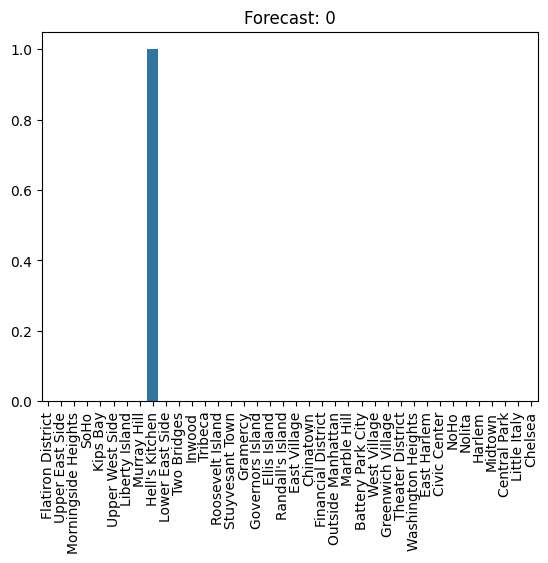

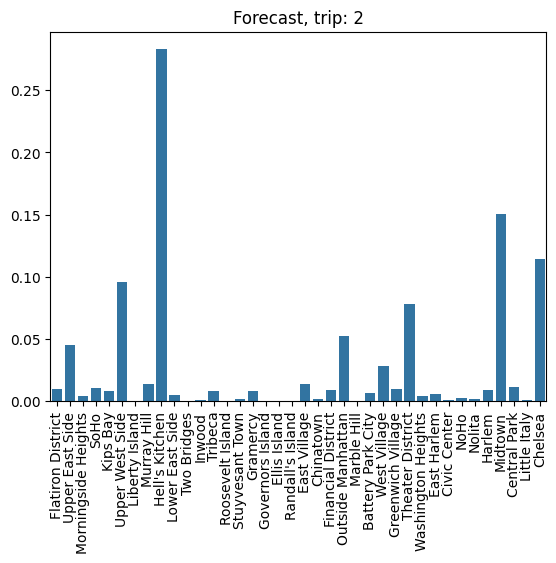

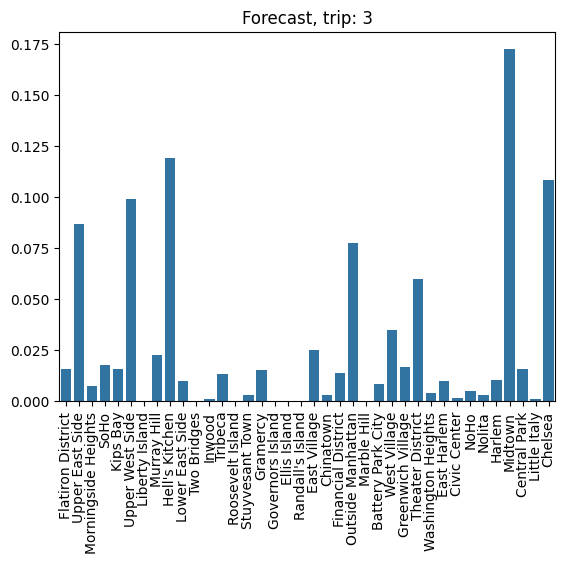

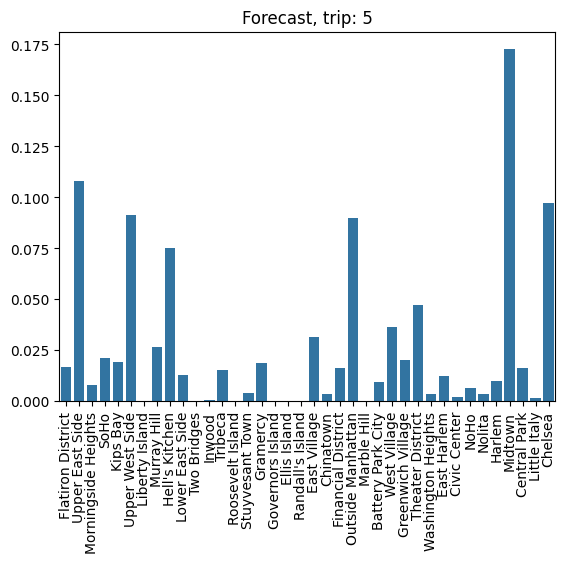

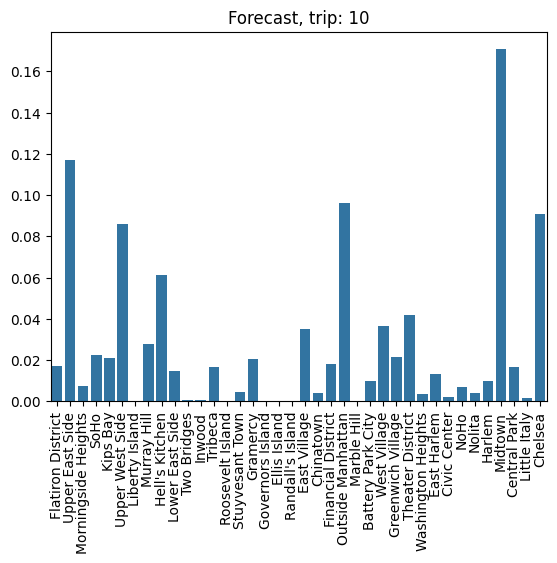

In [169]:
np.random.seed(100)

initial_state = "Hell's Kitchen" 
state_index = states.index(initial_state) 

density = np.zeros(len(states))
density[state_index] = 1

sns.barplot(x=states,y=density).set(title=f'Forecast: 0')
plt.xticks(rotation=90)
plt.show()

forecast = [initial_state]
for t in [2,3,5,10]: 
    density = density @ tr_pr
    forecast.append(density)
    sns.barplot(x=states,y=density).set(title=f'Forecast, trip: {t}')
    plt.xticks(rotation=90)
    plt.show()

In [170]:
np.random.seed(100)

initial_state = np.random.choice(states) # Choose an initial state at random
state_index = states.index(initial_state) # Get the index of the initial state

##Initial density:
density = np.zeros(len(states))
density[state_index] = 1

print(f'Transition matrix:\n {tr_pr} \n')
print(f'Initial Density:\n {density.reshape(-1,1)} \n')

Transition matrix:
 [[1.58300318e-01 4.70357271e-02 1.25988555e-03 ... 4.71065641e-03
  1.05749430e-03 1.53511235e-01]
 [6.98642069e-03 4.58642827e-01 4.50546571e-03 ... 3.29980237e-02
  2.69505843e-04 2.57413823e-02]
 [2.82105651e-03 8.08149719e-02 1.99114963e-01 ... 2.44245721e-02
  2.33551520e-04 2.61700624e-02]
 ...
 [6.60587639e-03 1.96285039e-01 9.11043566e-03 ... 1.41217156e-01
  3.48530902e-04 3.16244512e-02]
 [9.74320437e-03 2.75971081e-02 1.34746443e-03 ... 3.18727164e-03
  1.01526263e-01 6.09209401e-02]
 [2.98642813e-02 3.95246787e-02 2.12507513e-03 ... 5.53914683e-03
  1.02260394e-03 3.34834298e-01]] 

Initial Density:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] 



In [171]:
print("Forecast: \n")
for k in range(6):
    density = density @ tr_pr
    print(density)

Forecast: 

[1.02039900e-02 4.53776571e-02 4.15004186e-03 1.08149388e-02
 8.61862659e-03 9.62072979e-02 0.00000000e+00 1.36458865e-02
 2.82867703e-01 5.36132154e-03 1.60904988e-04 1.21209646e-03
 8.53858248e-03 1.93576052e-04 1.59189758e-03 8.17593368e-03
 0.00000000e+00 0.00000000e+00 6.12582443e-05 1.40461070e-02
 1.86061707e-03 9.02374778e-03 5.28552468e-02 3.83884998e-05
 6.74657464e-03 2.83952382e-02 9.91158393e-03 7.84154534e-02
 4.52412554e-03 5.61942295e-03 8.87019378e-04 2.67085945e-03
 1.65070549e-03 8.76319605e-03 1.50242787e-01 1.18620464e-02
 7.39182815e-04 1.14574153e-01]
[1.56184839e-02 8.69434609e-02 7.26749264e-03 1.77026438e-02
 1.58423099e-02 9.89469193e-02 1.94244994e-08 2.28747485e-02
 1.19191249e-01 1.00217605e-02 2.89088790e-04 8.75536484e-04
 1.33057863e-02 2.87640729e-04 3.12305605e-03 1.52552626e-02
 2.54980066e-07 8.17977648e-08 1.06663662e-04 2.49789598e-02
 3.06111299e-03 1.39957581e-02 7.78245683e-02 2.81495429e-05
 8.62285714e-03 3.51749405e-02 1.69904302

In [172]:
print("Final forecast: \n")
print(density)

sorted_indices = np.argsort(density)[::-1]
top_n = 5 

print("\n Where do cabs spend most of their time working in Manhattan?")
for i in range(min(top_n, len(states))):
    idx = sorted_indices[i]
    print(f"{i+1}. {states[idx]}: {density[idx]:.4f}")

Final forecast: 

[1.72011946e-02 1.21656994e-01 7.27917598e-03 2.35654481e-02
 2.18589169e-02 8.07210412e-02 4.25966796e-08 2.83597221e-02
 5.47085267e-02 1.56933069e-02 4.40938413e-04 6.32744904e-04
 1.74612524e-02 3.46051824e-04 4.74781894e-03 2.15238827e-02
 5.07309071e-07 1.27894485e-07 1.55180523e-04 3.78106981e-02
 4.49200656e-03 1.88357436e-02 1.01075182e-01 2.16972756e-05
 9.85235475e-03 3.64002225e-02 2.19614547e-02 3.87355990e-02
 3.21869176e-03 1.37854436e-02 2.46300169e-03 7.42877996e-03
 4.51687981e-03 9.61260673e-03 1.68619408e-01 1.63177057e-02
 1.64051081e-03 8.68730732e-02]

 Where do cabs spend most of their time working in Manhattan?
1. Midtown: 0.1686
2. Upper East Side: 0.1217
3. Outside Manhattan: 0.1011
4. Chelsea: 0.0869
5. Upper West Side: 0.0807
